<a href="https://colab.research.google.com/github/MAX181818/session/blob/main/Proyecto_CoderHouse_Juan_Guzman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ABSTRACT


Este conjunto de datos contiene información demográfica y diagnósticos de salud mental de niños que han sido víctimas de abuso sexual. Incluye datos personales, así como un registro sobre la presencia de algún trastorno mental. Este conjunto de datos es fundamental para analizar las posibles correlaciones entre el abuso sexual infantil y el desarrollo de enfermedades mentales. La información demográfica permite examinar cómo factores como la edad y la ubicación pueden influir en la prevalencia de trastornos mentales entre las víctimas. Este análisis podría contribuir a la creación de políticas y programas de apoyo más eficaces para ayudar a estas personas.

## Preguntas y Hipotesis
Pregunta: ¿La ubicación geográfica tiene un efecto en la salud mental de los niños?
Hipótesis: Se sugiere que los niños que viven en áreas con menos recursos podrían tener una mayor probabilidad de desarrollar problemas mentales, ya que a menudo enfrentan barreras en el acceso a servicios de salud y apoyo social.

Pregunta: ¿La edad influye en la probabilidad de que los niños desarrollen problemas mentales?
Hipótesis: Los niños más pequeños podrían ser más vulnerables a los trastornos mentales, ya que tienen menos herramientas para enfrentar y expresar las emociones relacionadas con experiencias traumáticas.

 Las instituciones que no cuentan con suficientes recursos o personal capacitado podrían tener una mayor incidencia de casos de abuso sexual, lo que a su vez podría contribuir a un aumento en los problemas de salud mental entre los niños que allí se encuentran.
  

In [1]:
!pip install lxml


In [2]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
df=pd.read_excel('/content/drive/MyDrive/CoderHouse Juan Guzman/DATA SCIENCE I/Base_Datos_2024_91.xlsx')

Datos eliminados, se eliminan los datos que no tengan numero de documento y se elimina la columna BENEFICIARIO el cual contiene el nombre del paciente con el fin de salvaguardar la identidad del mismo

In [7]:
df = df.drop_duplicates(subset='Num_documento', keep='first')
try:
    df.drop(columns=['Beneficiario'],inplace=True)
    df['Num_documento'] = range(1, len(df) + 1)
except:
    print('Ya fue eliminado y no se puede volver a hacer')

Ya fue eliminado y no se puede volver a hacer


Distribución de Edad por Enfermedad Mental, Se puede ver que la poblacion de mayor enfermedad mental roza los 13 años, por lo tanto, se deben hacer planes para mitirgar este riesgo de abuso sexual para niños que estan mas que todo en esa edad

<Figure size 1000x600 with 0 Axes>

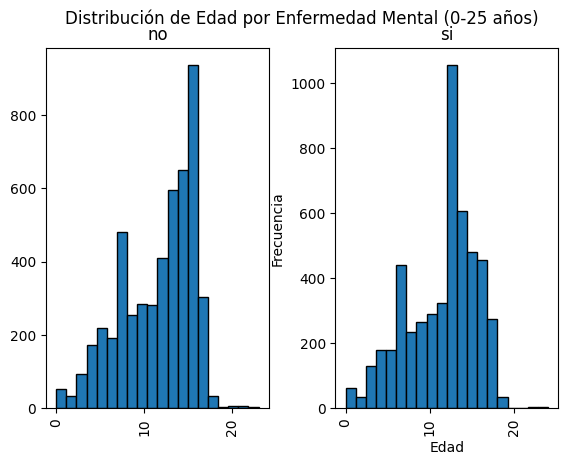

In [8]:
plt.figure(figsize=(10, 6))
df_filtered = df[df['Edad'] <= 25]
df_filtered['Edad'].hist(by=df_filtered['enfermedad_mental'], bins=20, edgecolor='black')
plt.suptitle('Distribución de Edad por Enfermedad Mental (0-25 años)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Casos por Localidad, podemos ver que nos hace falta identificar la localidad de muchos casos, por lo tanto, podemos decir que la localidad de Usaquen, rafael uribel y Engativa es quien mas enfermedades mentales tiene

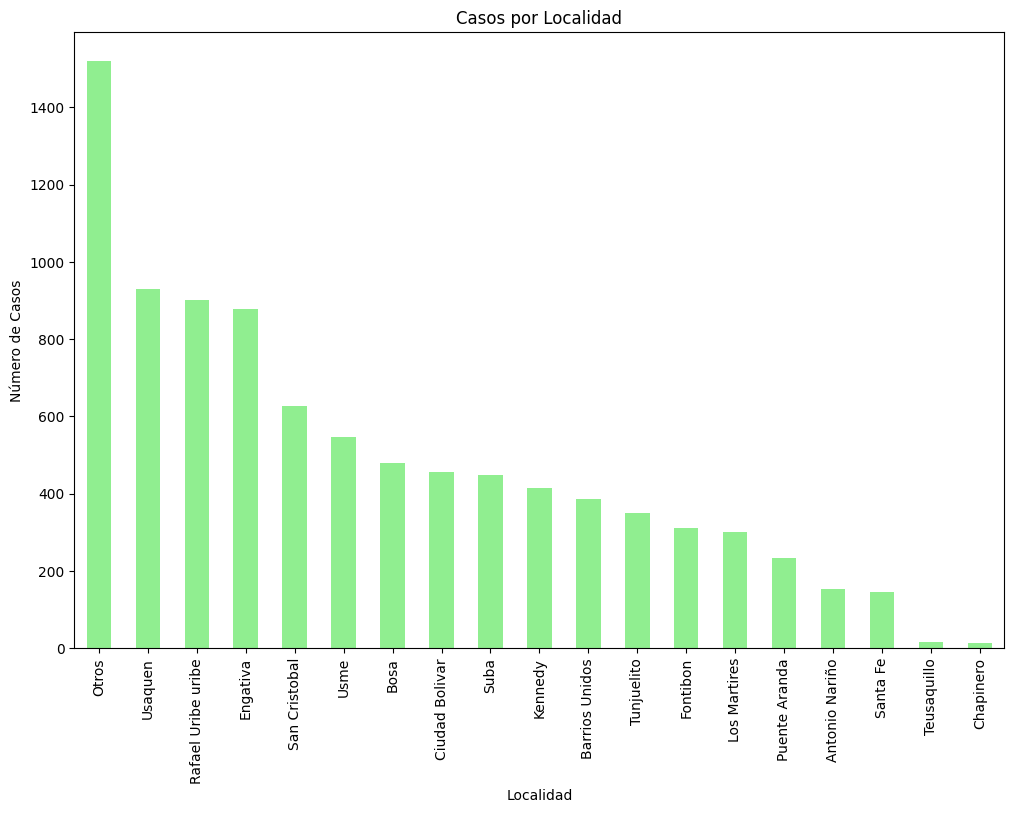

In [10]:
plt.figure(figsize=(12, 8))
df = df[df['Edad'] <= 25]
df['Localidad'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Casos por Localidad')
plt.xlabel('Localidad')
plt.ylabel('Número de Casos')
plt.xticks(rotation=90)
plt.show()


Boxplot de Edad por Enfermedad Mental, podemos ver que nuestra media de casos esta cerca a los 12 o 13 años lo cual tiene sentido con respecto a las anteriores graficas mostradas

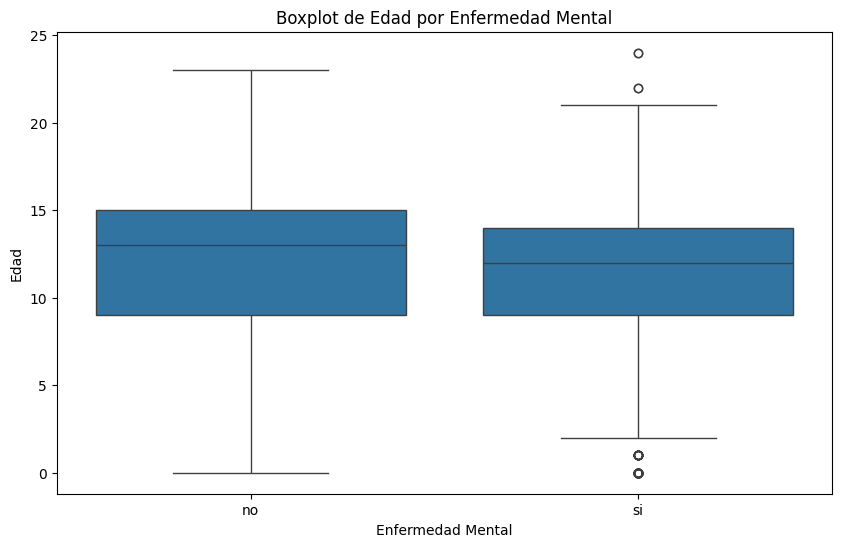

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='enfermedad_mental', y='Edad', data=df)
plt.title('Boxplot de Edad por Enfermedad Mental')
plt.xlabel('Enfermedad Mental')
plt.ylabel('Edad')
plt.show()


Indice de correlacion entre variables numericas

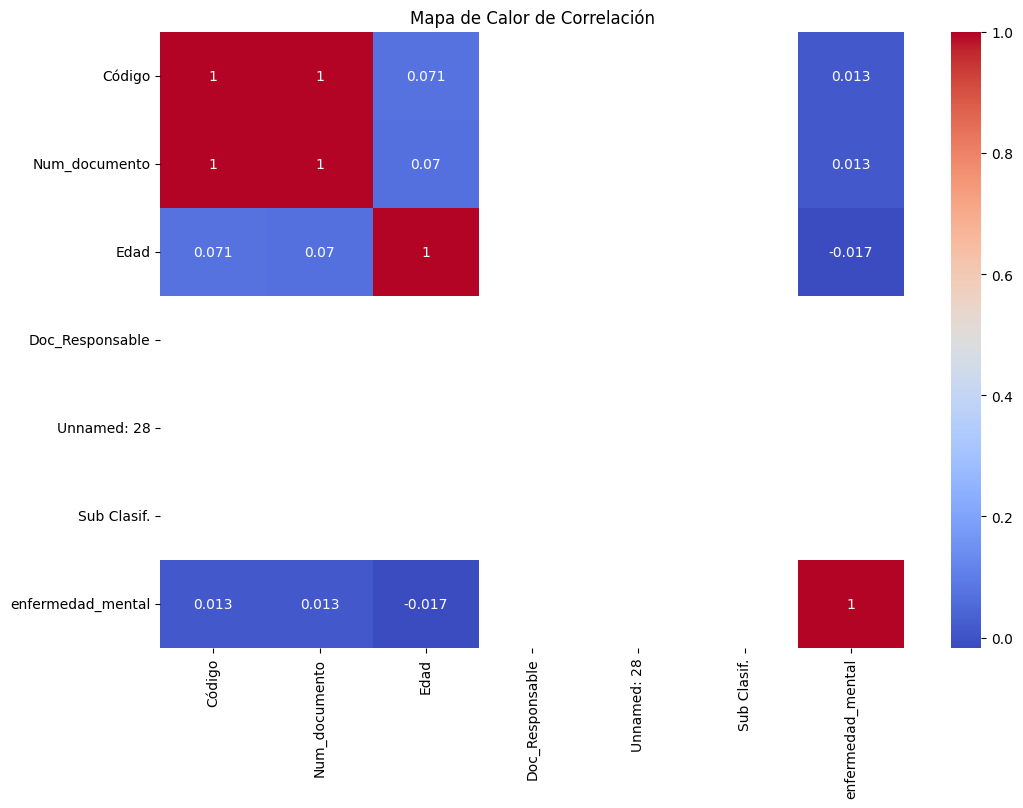

In [14]:
# Selecciona solo las columnas numéricas
df['enfermedad_mental'] = df['enfermedad_mental'].map({'si': 1, 'no': 0})

numeric_df = df.select_dtypes(include=[np.number])

# Calcula la matriz de correlación
correlation = numeric_df.corr()

# Genera el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()


Instituciones (Orfanatos) donde viven la gran cantidad de niños que tienen positivo para enfermedades mentales

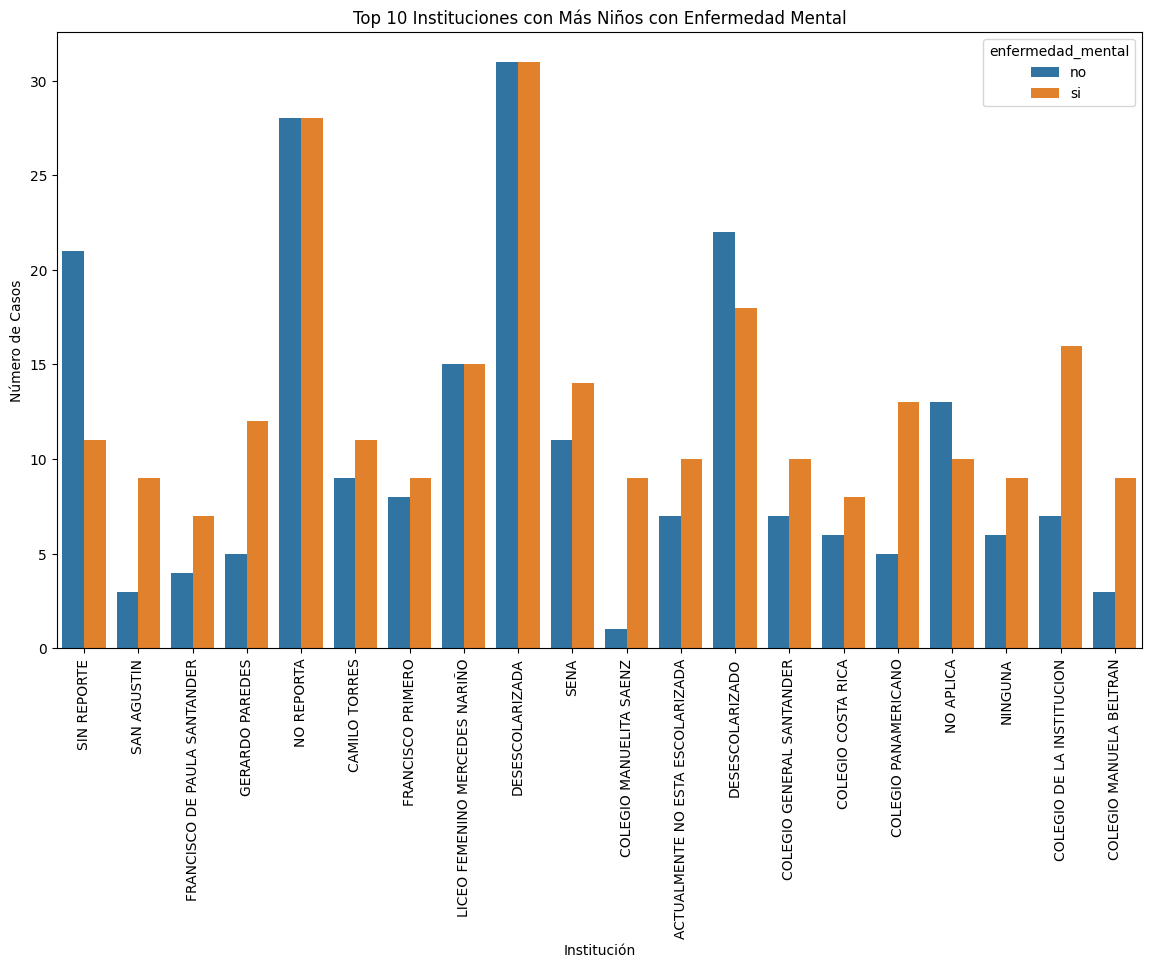

In [15]:
df['enfermedad_mental'] = df['enfermedad_mental'].map({1:'si', 0:'no'})
# Filtra el DataFrame para obtener el top 10 de instituciones con más casos de enfermedad mental

top_institutions = df[df['enfermedad_mental'] == 'si']['Institucion'].value_counts().nlargest(20).index
df_top_institutions = df[df['Institucion'].isin(top_institutions)]

# Genera el gráfico con el top 10 de instituciones
plt.figure(figsize=(14, 8))
sns.countplot(x='Institucion', hue='enfermedad_mental', data=df_top_institutions)
plt.title('Top 10 Instituciones con Más Niños con Enfermedad Mental')
plt.xlabel('Institución')
plt.ylabel('Número de Casos')
plt.xticks(rotation=90)
plt.show()